In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from sklearn.preprocessing import MinMaxScaler
import scipy.io as sio
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
import scipy.io as sio
import datetime
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from scipy.stats import iqr
from scipy.stats import wilcoxon, spearmanr
from statsmodels.stats.descriptivestats import sign_test
import calendar
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pingouin as pg
from sklearn.cluster import DBSCAN

In [2]:
main_folder = '/Users/amrutapai/Library/CloudStorage/Box-Box/SDRI Datasets/SDRI-Rice Digital-Health-Study/'

a1 = '1'
a2 = '2'
a3 = '3'
a4 = '4'

In [3]:
df_cor_labels_a1 = pd.DataFrame()
df_cor_labels_a2 = pd.DataFrame()
df_cor_labels_a3 = pd.DataFrame()
df_cor_labels_a4 = pd.DataFrame()

df_an_labels_a1 = pd.DataFrame()
df_an_labels_a2 = pd.DataFrame()
df_an_labels_a3 = pd.DataFrame()
df_an_labels_a4 = pd.DataFrame()

for i, pc in enumerate(range(1, 37,1)):
    print("-----------------------------------------------------------------------------------------------")
    print(pc)

    
    if pc not in [100]:
        if len(str(pc)) == 1:
                nm = '00'+ str(pc)
        else:
                nm = '0'+ str(pc)

        pct_name = 'digh01'+ nm 
        
        df_cor_labels_a1 = df_cor_labels_a1.append(pd.read_csv(main_folder+'annotations/'+a1+'/'+pct_name + '_'+ 'corrections.csv'))
        df_cor_labels_a2 = df_cor_labels_a2.append(pd.read_csv(main_folder+'annotations/'+a2+'/'+pct_name + '_'+ 'corrections.csv'))
        df_cor_labels_a3 = df_cor_labels_a3.append(pd.read_csv(main_folder+'annotations/'+a3+'/'+pct_name + '_'+ 'corrections.csv'))
        df_cor_labels_a4 = df_cor_labels_a4.append(pd.read_csv(main_folder+'annotations/'+a4+'/'+pct_name + '_'+ 'corrections.csv'))
        
        df_an_labels_a1 = df_an_labels_a1.append(pd.read_csv(main_folder+'annotations/'+a1+'/'+pct_name + '_'+ 'annotations.csv'))
        df_an_labels_a2 = df_an_labels_a2.append(pd.read_csv(main_folder+'annotations/'+a2+'/'+pct_name + '_'+ 'annotations.csv'))
        df_an_labels_a3 = df_an_labels_a3.append(pd.read_csv(main_folder+'annotations/'+a3+'/'+pct_name + '_'+ 'annotations.csv'))
        df_an_labels_a4 = df_an_labels_a4.append(pd.read_csv(main_folder+'annotations/'+a4+'/'+pct_name + '_'+ 'annotations.csv'))
        
        

        
df_cor_labels_a1['person'] = 1    
df_cor_labels_a2['person'] = 2 
df_cor_labels_a3['person'] = 3 
df_cor_labels_a4['person'] = 4 

df_an_labels_a1['person'] = 1 
df_an_labels_a2['person'] = 2 
df_an_labels_a3['person'] = 3 
df_an_labels_a4['person'] = 4
        
df_cor_labels_a1.to_csv(os.path.join(main_folder, '1_'+ 'corrections.csv'), index=False)
df_cor_labels_a2.to_csv(os.path.join(main_folder, '2_'+ 'corrections.csv'), index=False)  
df_cor_labels_a3.to_csv(os.path.join(main_folder, '3_'+ 'corrections.csv'), index=False)  
df_cor_labels_a4.to_csv(os.path.join(main_folder, '4_'+ 'corrections.csv'), index=False)  


df_an_labels_a1.to_csv(os.path.join(main_folder, '1_'+ 'annotations.csv'), index=False)
df_an_labels_a2.to_csv(os.path.join(main_folder, '2_'+ 'annotations.csv'), index=False)  
df_an_labels_a3.to_csv(os.path.join(main_folder, '3_'+ 'annotations.csv'), index=False) 
df_an_labels_a4.to_csv(os.path.join(main_folder, '4_'+ 'annotations.csv'), index=False) 


df_all_labels_correction =  pd.concat([df_cor_labels_a1, df_cor_labels_a2, df_cor_labels_a3, df_cor_labels_a4], ignore_index=True)
df_all_labels_annotation =  pd.concat([df_an_labels_a1, df_an_labels_a2, df_an_labels_a3, df_an_labels_a4], ignore_index=True)


-----------------------------------------------------------------------------------------------
1
-----------------------------------------------------------------------------------------------
2
-----------------------------------------------------------------------------------------------
3
-----------------------------------------------------------------------------------------------
4
-----------------------------------------------------------------------------------------------
5
-----------------------------------------------------------------------------------------------
6
-----------------------------------------------------------------------------------------------
7
-----------------------------------------------------------------------------------------------
8
-----------------------------------------------------------------------------------------------
9
-----------------------------------------------------------------------------------------------
10
-------------------

In [4]:
df_all_labels_correction

,time_corr,cal,carb,date,fat,fd_index,label,pro,time,uid,person
0,2.482366,300.0,35.0,04/09/21,7.0,[0],lunch,20.0,12.000000,1.0,1
1,18.606828,352.0,38.0,04/09/21,13.0,[1 2 3],dinner,24.0,18.333333,1.0,1
2,7.093145,369.0,27.0,04/10/21,18.0,[4 5],breakfast,22.0,6.583333,1.0,1
3,12.602016,410.0,41.0,04/10/21,24.0,[6 7],lunch,11.0,12.166667,1.0,1
4,21.091532,361.0,28.0,04/10/21,15.0,[ 8 9 10],dinner,27.0,20.500000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5863,2.356048,403.0,37.0,08/26/21,25.0,[38 39],breakfast,17,9.833333,36.0,4
5864,5.088804,190.0,34.0,08/31/21,4.0,[40 41],breakfast,5,9.166667,36.0,4
5865,2.509274,81.0,15.0,08/31/21,0.0,[42],snacks,0,13.000000,36.0,4
5866,2.485717,380.0,37.0,08/31/21,8.0,[43],lunch,40,14.916667,36.0,4


In [5]:
print('Annotator 1')
print(len(df_cor_labels_a1))
print(len(df_cor_labels_a1[(df_cor_labels_a1['time_corr'] >=4)&(df_cor_labels_a1['time_corr']<= 24)]))
print(len(df_an_labels_a1[(df_an_labels_a1['time'] >=4)&(df_an_labels_a1['time']<= 24)]))

print('Annotator 2')
print(len(df_cor_labels_a2))
print(len(df_cor_labels_a2[(df_cor_labels_a2['time_corr'] >=4)&(df_cor_labels_a2['time_corr']<= 24)]))
print(len(df_an_labels_a2[(df_an_labels_a2['time'] >=4)&(df_an_labels_a2['time']<= 24)]))

print('Annotator 3')
print(len(df_cor_labels_a3))
print(len(df_cor_labels_a3[(df_cor_labels_a3['time_corr'] >=4)&(df_cor_labels_a3['time_corr']<= 24)]))
print(len(df_an_labels_a3[(df_an_labels_a3['time'] >=4)&(df_an_labels_a3['time']<= 24)]))


print('Annotator 4')
print(len(df_cor_labels_a4))
print(len(df_cor_labels_a4[(df_cor_labels_a4['time_corr'] >=4)&(df_cor_labels_a4['time_corr']<= 24)]))
print(len(df_an_labels_a4[(df_an_labels_a4['time'] >=4)&(df_an_labels_a4['time']<= 24)]))

Annotator 1
1467
1154
601
Annotator 2
1467
1078
630
Annotator 3
1467
1064
444
Annotator 4
1467
1356
398


In [20]:
df_together1 = df_cor_labels_a1[['uid', 'time','date','cal','carb','fat','fd_index','label','pro']]

df_together1['time_corr_a1'] = df_cor_labels_a1['time_corr']
df_together1['time_corr_a2'] = df_cor_labels_a2['time_corr']
df_together1['time_corr_a3'] = df_cor_labels_a3['time_corr']
df_together1['time_corr_a4'] = df_cor_labels_a4['time_corr']
df_together = df_together1[df_together1['uid'].isin([100]) == False].reset_index(drop=True)


df_together['known_a1']= 0
df_together.loc[(df_together['time_corr_a1']>=4)&(df_together['time_corr_a1']<=24),'known_a1']= 1

df_together['known_a2']= 0
df_together.loc[(df_together['time_corr_a2']>=4)&(df_together['time_corr_a2']<=24),'known_a2']= 1

df_together['known_a3']= 0
df_together.loc[(df_together['time_corr_a3']>=4)&(df_together['time_corr_a3']<=24),'known_a3']= 1


df_together['known_a4']= 0
df_together.loc[(df_together['time_corr_a4']>=4)&(df_together['time_corr_a4']<=24),'known_a4']= 1

In [21]:
df_together

,uid,time,date,cal,carb,fat,fd_index,label,pro,time_corr_a1,time_corr_a2,time_corr_a3,time_corr_a4,known_a1,known_a2,known_a3,known_a4
0,1.0,12.000000,04/09/21,300.0,35.0,7.0,[0],lunch,20.0,2.482366,2.398955,11.967843,12.593495,0,0,1,1
1,1.0,18.333333,04/09/21,352.0,38.0,13.0,[1 2 3],dinner,24.0,18.606828,18.623316,18.619748,18.606828,1,1,1,1
2,1.0,6.583333,04/10/21,369.0,27.0,18.0,[4 5],breakfast,22.0,7.093145,7.117097,7.134813,7.133065,1,1,1,1
3,1.0,12.166667,04/10/21,410.0,41.0,24.0,[6 7],lunch,11.0,12.602016,12.661097,12.589487,12.615323,1,1,1,1
4,1.0,20.500000,04/10/21,361.0,28.0,15.0,[ 8 9 10],dinner,27.0,21.091532,21.194258,21.093183,21.118145,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,36.0,9.833333,08/26/21,403.0,37.0,25.0,[38 39],breakfast,17,9.621371,2.365097,2.463374,2.356048,1,0,0,0
1463,36.0,9.166667,08/31/21,190.0,34.0,4.0,[40 41],breakfast,5,2.497496,5.067602,5.089062,5.088804,0,1,1,1
1464,36.0,13.000000,08/31/21,81.0,15.0,0.0,[42],snacks,0,2.485717,2.421641,2.464395,2.509274,0,0,0,0
1465,36.0,14.916667,08/31/21,380.0,37.0,8.0,[43],lunch,40,2.485717,2.376411,2.464395,2.485717,0,0,0,0


In [23]:
df_sum = df_together['known_a1'].values +df_together['known_a2'].values + df_together['known_a3'].values + df_together['known_a4'].values

print(len(np.where(df_sum==4)[0]))
print(len(np.where(df_sum==2)[0]))
print(len(np.where(df_sum==0)[0]))
print(len(np.where(df_sum==1)[0]))

df_together_icc = df_together[df_sum == 4]

951
113
79
175


In [24]:
df = df_together_icc[['time_corr_a1', 'time_corr_a2', 'time_corr_a3', 'time_corr_a4']]
df['index'] = df.index
df = pd.melt(df, id_vars=['index'], value_vars=list(df)[:-1])

print(df)

      index      variable      value
0         1  time_corr_a1  18.606828
1         2  time_corr_a1   7.093145
2         3  time_corr_a1  12.602016
3         4  time_corr_a1  21.091532
4         6  time_corr_a1  11.870161
...     ...           ...        ...
3799   1456  time_corr_a4   9.142339
3800   1457  time_corr_a4  11.138306
3801   1458  time_corr_a4  17.299194
3802   1459  time_corr_a4   8.104435
3803   1460  time_corr_a4  21.104839

[3804 rows x 3 columns]


In [25]:
icc = pg.intraclass_corr(
    data=df, targets='index', raters='variable', ratings='value'
)
icc = icc.set_index('Description')

print(icc.loc['Single random raters', 'ICC'].round(3))

0.946


In [26]:
def auc (cgm_val, idx0, t1, min_t_diff):
    
    idx_f = idx0 + t1
    
    cgm_diff = cgm_val[idx_f: idx_f+9] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f2 = np.trapz(cgm_diff, dx=15)
    
    cgm_diff = cgm_val[idx_f: idx_f+13] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f3 = np.trapz(cgm_diff, dx=15)
    
    
    cgm_diff = cgm_val[idx_f: idx_f+17] - cgm_val[idx_f]
    cgm_diff[cgm_diff<= 0] = 0
    auc_f4 = np.trapz(cgm_diff, dx=15)
    


    
    
    
    t2p = np.argmax(cgm_val[idx_f: idx_f+13])*15
    maxrise = np.max(cgm_val[idx_f: idx_f+13]) - cgm_val[idx_f]
    
    maxval = np.max(cgm_val[idx_f: idx_f+13])
    bval = cgm_val[idx_f]
    
    if (np.max(cgm_val[idx_f: idx_f+13]) >=500) or (np.min(cgm_val[idx_f: idx_f+13]) <= 40) or (len(cgm_val[idx_f: idx_f+13])!= 13) or (min_t_diff >= (15/(24*60))):
        return -1, -1, -1, -1, -1, -1, -1,
    
    else:
    
        
        return auc_f2, auc_f3, auc_f4, t2p, maxrise, maxval, bval, 


def predict(core_times, given_time, cluster_lbs):
    
    
    found_labels = []
    for i in given_time:
        
        dist = np.abs(core_times-i)
        found_labels.append(cluster_lbs[np.argmin(dist)])
        
    return np.array(found_labels)
    
  
        
        

In [27]:
at_least = []
max_dist = []
min_dist_bet = []

df_cor_labels = df_all_labels_correction.copy()
df_cor_labels = df_cor_labels[(df_cor_labels['time_corr'] >= 4) & (df_cor_labels['time_corr'] <= 24)].reset_index(drop=True)
df_big3 = df_all_labels_annotation.copy()
df_big3 = df_big3[(df_big3['time'] >= 4) & (df_big3['time'] <= 24)].reset_index(drop=True)
df_together_x = df_together.copy()


df_cor_labels['datetime'] = [datetime.datetime.strptime(df_cor_labels['date'].values[i],'%m/%d/%y') for i in range(len(df_cor_labels['date'].values))] 
df_big3['datetime'] = [datetime.datetime.strptime(df_big3['date'].values[i],'%m/%d/%y') for i in range(len(df_big3['date'].values))] 
df_together_x['datetime'] = [datetime.datetime.strptime(df_together['date'].values[i],'%m/%d/%y') for i in range(len(df_together['date'].values))] 

plot=False

df_times = pd.DataFrame()
for i, pc in enumerate(np.arange(1, 37,1)):
#     np.arange(1, 37,1)
    print("-----------------------------------------------------------------------------------------------")
    
     
    
    if pc not in [100]:
        if len(str(pc)) == 1:
                nm = '00'+ str(pc)
        else:
                nm = '0'+ str(pc)

        pct_name = 'digh01'+ nm 
        
        print(pct_name)
        
        for filename in os.listdir(os.path.join(main_folder, pct_name)):
            
            if filename.startswith("CGM"):
                cgm_filename = filename
          
                
        df = pd.read_csv(os.path.join(main_folder,pct_name,cgm_filename), skiprows=[0,1]) 
        df_cgm = pd.DataFrame(columns=['datetime','glucose'])
        df_cgm['datetime'] = [datetime.datetime.strptime(df['Device Timestamp'].values[i], 
                                                     '%m/%d/%Y %H:%M') 
                          for i in range(len(df['Device Timestamp'].values))]

        df_cgm['glucose'] = df['Historic Glucose mg/dL']
        df_day = df_cgm ['datetime'].dt.date
        time_axis = df_cgm['datetime'].dt.hour + (df_cgm['datetime'].dt.minute / 60)
        
        cgm_ylim_min = np.min(df_cgm['glucose'].values)
        cgm_ylim_max = np.max(df_cgm['glucose'].values)
        
    
        
        for dt_nm in np.unique(df_day):
            
            idx_cgm = np.where(df_day == dt_nm)[0]
            cgm_val = df_cgm['glucose'].values[idx_cgm]
            time_axis = df_cgm['datetime'].dt.hour + (df_cgm['datetime'].dt.minute / 60)
            
            
            time_axis[idx_cgm[-1]+1:] = time_axis[idx_cgm[-1]+1:] + 24
            
            cgm_time_dec = (np.array([v*60 for v in df_cgm['datetime'].dt.hour.values[idx_cgm]]) + np.array([v for v in df_cgm['datetime'].dt.minute.values[idx_cgm]]))/(24*60)
            
        
            fd_corr = df_cor_labels[(df_cor_labels['uid'] == pc) & (
                                    df_cor_labels['datetime'].dt.date == dt_nm)].reset_index(
                            drop=True)['time_corr'].values


            fd_corr_big3 = df_big3[(df_big3['uid'] == pc) & (
                                    df_big3['datetime'].dt.date == dt_nm)].reset_index(
                            drop=True)['time'].values
        
                    
            
           
            
            fd_all = np.sort(np.concatenate([fd_corr, fd_corr_big3]))
#             print(fd_all)
            
            if len(fd_all)==0:
                continue

#             print(len(fd_all))
            
            clustering = DBSCAN(eps=1.5, min_samples=2).fit(fd_all.reshape(-1, 1))
            
            fd_all_clusters = clustering.labels_ 
            un_cl_labels = np.unique(fd_all_clusters[fd_all_clusters>=0])
            
#             print(fd_all_clusters)
            
            final_times = []
            cl_labels_final = []
            auc_f_all = []
            
            max_val = []
            min_val = []
            
            for clus_id in un_cl_labels:
                
                ix_cl = np.where(fd_all_clusters== clus_id)[0]
                
                auc_all = []
                peak_val_all = []
                for fd_min_ix, fd_min in enumerate(fd_all[ix_cl]):

                    t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm[0] + idx_min
                    
                    auc_f2, auc_f3, auc_f4, t2p, peak_val, maxval, bval  = auc(df_cgm['glucose'].values, idx_cgm[0], idx_f - idx_cgm[0], np.min(t_diff))

                    
                    auc_all.append(auc_f3)
                    peak_val_all.append(peak_val)
            
            
                peak_val_all = np.array(peak_val_all)
                max_dist.append(np.max(fd_all[ix_cl]) - np.min(fd_all[ix_cl]))
                at_least.append(len(ix_cl))
                
                max_val.append(np.max(fd_all[ix_cl]))
                min_val.append(np.min(fd_all[ix_cl]))
                
#                 if peak_val_all[np.argmax(auc_all)] > 18.6:
            
                final_times.append(fd_all[ix_cl][np.argmax(auc_all)])
                auc_f_all.append(np.argmax(auc_all))
                cl_labels_final.append(clus_id)
            
            
            final_times = np.array(final_times)
            cl_labels_final = np.array(cl_labels_final)
            max_val = np.array(max_val)
            min_val = np.array(min_val)


            final_times_f = np.array(final_times)
            cl_labels_final_f = np.array(cl_labels_final)
            min_dist_bet.extend(final_times_f[1:]-final_times_f[0:-1]) 
            

             
                 
            
            
            
            
#             print(final_times)
#             print(un_cl_labels)
            
#             print('-----')
            
            together_ix = np.where((df_together_x['uid'] == pc) & (
                                    df_together_x['datetime'].dt.date == dt_nm))[0]
            
            for ix in together_ix:
                
                fd_together = []
                if df_together_x['known_a1'].values[ix] == 1:

                    fd_together.append(df_together_x['time_corr_a1'].values[ix])

                if df_together['known_a2'].values[ix] == 1:

                    fd_together.append(df_together_x['time_corr_a2'].values[ix])

                if df_together['known_a3'].values[ix] == 1:

                    fd_together.append(df_together_x['time_corr_a3'].values[ix])
                    
                if df_together['known_a4'].values[ix] == 1:

                    fd_together.append(df_together_x['time_corr_a4'].values[ix])



                fd_together = np.array(fd_together)
                
                
                if len(fd_together) >= 3 and len(final_times)!=0:
#                     print(fd_together)
                    
                    fd_together_predict = predict(final_times_f, fd_together, cl_labels_final_f)
#                     print(fd_together_predict)
                    for clus_ix,clus_id in enumerate(cl_labels_final):
                        
                        if len(np.where(fd_together_predict == clus_id)[0]) >= 3:
                            
                            found_time = final_times[clus_ix]
                            break
                            
                        else:
                            
                            found_time = 2.5
                            
                            
                else:

                    found_time = 2.5
                    
                
                
                
                df_together_x.loc[ix, 'time_final'] = found_time
#                 print(found_time)
                    

            if  len(final_times_f) >= 1:
            
#                 if len(final_times_f[1:]-final_times_f[0:-1]) == 0:
                    
#                     continue
                    
#                 if (np.min(final_times_f[1:]-final_times_f[0:-1]) >= 3):
                
#                     continue
                
#                 print(final_times_f[1:]-final_times_f[0:-1])  
                
#                 len(fd_all) >= 1 and np.min(fd_all) <= 12
                
                
                if plot==True:
                    plt.figure(figsize=[7, 3])
                    plt.plot(time_axis[idx_cgm[0]: idx_cgm[-1]+13], df_cgm['glucose'].values[idx_cgm[0]: idx_cgm[-1]+13],  'b*-')

                
                
                

                
                for fd_min_ix, fd_min in enumerate(final_times_f):
                    

                    t_diff = np.abs(cgm_time_dec -  (fd_min/24))
                    idx_min = np.argmin(t_diff)
                    idx_f = idx_cgm[0] + idx_min
                    auc_f2, auc_f3, auc_f4, t2p, peak_val, maxval, bval  = auc(df_cgm['glucose'].values, idx_cgm[0], idx_f - idx_cgm[0], np.min(t_diff))


                    
                    if plot==True:
                        plt.plot(time_axis[idx_f : idx_f+13], df_cgm['glucose'].values[idx_f : idx_f+13], 'k*-')
                        plt.axvline(x=fd_min, c='k')
                    
                    if peak_val >= 18.6:
                        df_times = df_times.append({'date': dt_nm.strftime('%m/%d/%y'), 'uid': pc, 'time_final': fd_min},
                                               ignore_index=True)
                        
                    

        
                if plot==True:
                
#                     axs[0].axvline(x=time_axis[idx_start], c='k')           
                    plt.title(pct_name+ " "+ dt_nm.strftime('%m/%d/%Y'), fontsize=20)
#                     axs[0].xlabel('time of the day (hours)', fontsize=20)
#                     axs[0].ylabel('glucose level (mg/dl)', fontsize=20)
#                     axs[1].bar(time_axis_acti[stps_1],df_acti['stepcount'].values[stps_1], width=0.23)
#                     axs[1].ylabel('activity stepcount (steps)', fontsize=20)
#                     axs[0].xticks(fontsize= 20)
#                     axs[0].yticks(fontsize= 20)
#                     axs[1].xticks(fontsize= 20)
#                     axs[1].yticks(fontsize= 20)
                    plt.ylim([cgm_ylim_min, cgm_ylim_max])
                    plt.tick_params(axis="x", labelsize=20) 
                    plt.tick_params(axis="y", labelsize=20)
                   
                    plt.show()
                    
                    

            

 

-----------------------------------------------------------------------------------------------
digh01001
-----------------------------------------------------------------------------------------------
digh01002
-----------------------------------------------------------------------------------------------
digh01003
-----------------------------------------------------------------------------------------------
digh01004
-----------------------------------------------------------------------------------------------
digh01005
-----------------------------------------------------------------------------------------------
digh01006
-----------------------------------------------------------------------------------------------
digh01007
-----------------------------------------------------------------------------------------------
digh01008
-----------------------------------------------------------------------------------------------
digh01009
----------------------------------------------

In [28]:
print(np.min(at_least))
print(np.max(max_dist))
print(np.min(min_dist_bet))
print(len(df_times))

2
4.045161290322577
1.5302419354838719
1584


In [29]:
print(np.mean(min_dist_bet))
print(np.mean(max_dist))

4.542572012745994
0.32384173741541616


In [30]:
min_dist_bet = np.array(min_dist_bet)
print(len(min_dist_bet[min_dist_bet<3])/len(min_dist_bet))


0.16976556184316896


(array([170., 352., 353., 225.,  79.,  35.,  17.,   5.,   0.,   1.]),
 array([ 1.53024194,  2.77516208,  4.02008222,  5.26500237,  6.50992251,
         7.75484265,  8.9997628 , 10.24468294, 11.48960308, 12.73452323,
        13.97944337]),
 <BarContainer object of 10 artists>)

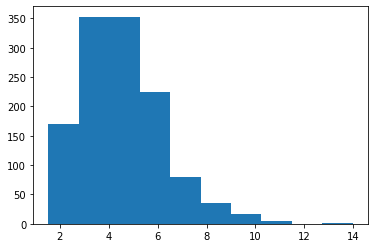

In [31]:
plt.hist(min_dist_bet)

In [32]:
max_dist = np.array(max_dist)
print(len(max_dist[max_dist>3])/len(max_dist))

0.003981797497155859


In [34]:
df_together_x.to_csv(os.path.join(main_folder, 'corrected_meals_with_final_times_revis.csv'), index=False)

In [35]:
df_times.to_csv(os.path.join(main_folder, 'final_times_revis.csv'), index=False)

In [36]:
df_together

,uid,time,date,cal,carb,fat,fd_index,label,pro,time_corr_a1,time_corr_a2,time_corr_a3,time_corr_a4,known_a1,known_a2,known_a3,known_a4
0,1.0,12.000000,04/09/21,300.0,35.0,7.0,[0],lunch,20.0,2.482366,2.398955,11.967843,12.593495,0,0,1,1
1,1.0,18.333333,04/09/21,352.0,38.0,13.0,[1 2 3],dinner,24.0,18.606828,18.623316,18.619748,18.606828,1,1,1,1
2,1.0,6.583333,04/10/21,369.0,27.0,18.0,[4 5],breakfast,22.0,7.093145,7.117097,7.134813,7.133065,1,1,1,1
3,1.0,12.166667,04/10/21,410.0,41.0,24.0,[6 7],lunch,11.0,12.602016,12.661097,12.589487,12.615323,1,1,1,1
4,1.0,20.500000,04/10/21,361.0,28.0,15.0,[ 8 9 10],dinner,27.0,21.091532,21.194258,21.093183,21.118145,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,36.0,9.833333,08/26/21,403.0,37.0,25.0,[38 39],breakfast,17,9.621371,2.365097,2.463374,2.356048,1,0,0,0
1463,36.0,9.166667,08/31/21,190.0,34.0,4.0,[40 41],breakfast,5,2.497496,5.067602,5.089062,5.088804,0,1,1,1
1464,36.0,13.000000,08/31/21,81.0,15.0,0.0,[42],snacks,0,2.485717,2.421641,2.464395,2.509274,0,0,0,0
1465,36.0,14.916667,08/31/21,380.0,37.0,8.0,[43],lunch,40,2.485717,2.376411,2.464395,2.485717,0,0,0,0
